In [28]:
import numpy as np
import pandas as pd
from functions import *
from schemes import *
from plot import * 
from Kepler import *
from adaptive import * 

%matplotlib inline

In [29]:
# gravity
G = 1

# mass ratio & eccentricity 
q = 1.0 # q = m2 / m1
e = 0.5

m1 = 1 # central mass
m2 = q # orbiting mass
mu = G * (m1 + m2) 

# position
r1 = np.array([0,0.0,0.0], dtype="float64")
r2 = np.array([1,0.0,0.0], dtype="float64")

# velocity 
v1 = np.array([0,0.0,0], dtype="float64")
v2 = np.array([0,np.sqrt((1 + q)*(1 + e)),0], dtype="float64")

# create initial vectors
r0s = np.array([r1,r2])
v0s = np.array([v1,v2])
masses = np.array([m1, m2])

In [30]:
T = 100
h0 = 0.01

In [32]:
FR_traj = run_adaptive(PEFRLStep, 0, T, h0, r0s, v0s, G, masses, 0.5)
print('done')
RKF_traj = run_adaptive_scheme(RKF45Step, 0 , T, h0, r0s, v0s, G, masses, tolerance = 1e-6)
print('done')
# Leapfrog_traj = run_adaptive_scheme(AdaptiveLeapfrog, 0, T, h0, r0s, v0s, G, masses, tolerance = 1e-6)


done
done


In [33]:
FR_traj = run_adaptive_symplectic(PEFRLStep, 0, T, h0, r0s, v0s, G, masses, 0.5)

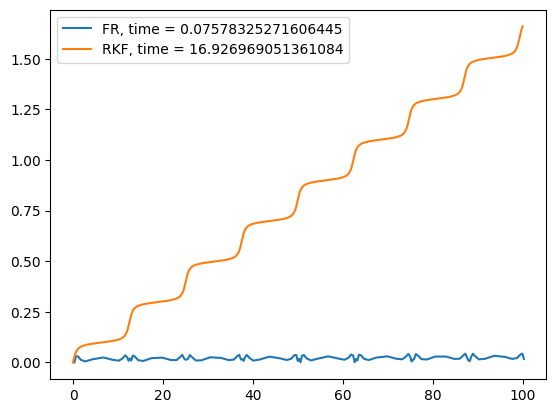

In [34]:
traj = FR_traj
E_traj = traj[3]
t_traj = traj[0]
time = traj[-1]

plt.plot(t_traj, RelativeEnergy(E_traj), label = f'FR, time = {time}')

traj = RKF_traj
E_traj = traj[3]
t_traj = traj[0]
time = traj[-1]

plt.plot(t_traj, RelativeEnergy(E_traj), label = f'RKF, time = {time}')

plt.legend()

# plt.yscale('log')

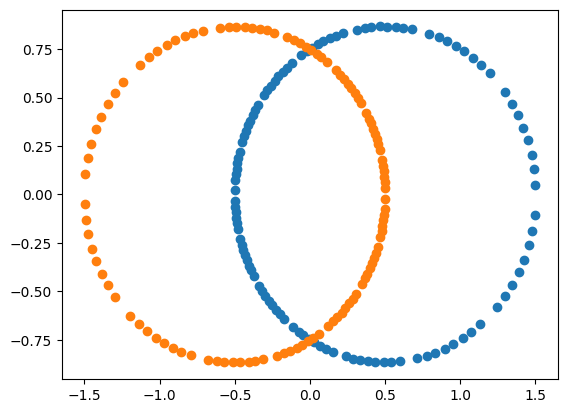

In [ ]:
rs_traj = FR_traj[1]
plt.scatter(rs_traj[:,0,0], rs_traj[:,0,1])
plt.scatter(rs_traj[:,1,0], rs_traj[:,1,1])